<ipython-input-1-36d5e65d1a20>:147: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


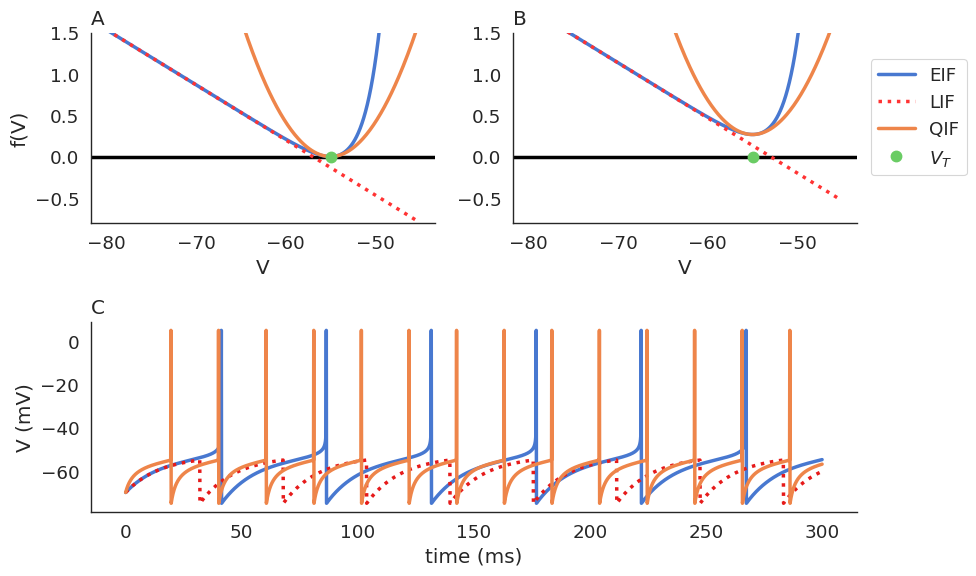

In [1]:
###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This makes plots show up and look nice
%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

###############################################
###############################################


# Neuron parameters
EL=-72
taum=15
Vth=5
Vre=-75
VT=-55
D=2


# RHS of ODE as a function of V and I0
def fEIF(V,I0):
    return (-(V-EL)+D*np.exp((V-VT)/D)+I0)/taum

# RHS of ODE as a function of V and I0
def fLIF(V,I0):
    return (-(V-EL)+I0)/taum

# RHS of ODE as a function of V and I0
V1=VT
V2=VT
c=1/(2*D*taum)
def fQIF(V,I0QIF):
    return c*(V-V1)*(V-V2)+I0QIF

# fQIF[V_] = c (V - V1) (V - V2) + I0QIF
# fLIF[V_] = (-(V - EL) + I0)/taum
# sQE = {c -> 1/(2 d taum), V1 -> VT, V2 -> VT,
#   I0QIF -> (d + EL + I0 - VT)/taum }




# Range of V over which to plot f(V)
Vplot=np.arange(-80,VT+10,.1)

Ith=VT-EL-D

plt.subplots(2,2,figsize=(10, 6))

# Plot the phase line with I0=5
I0=Ith
I0QIF=(I0-VT+EL+D)/taum
plt.subplot(2,2,1)
plt.axhline(y=0,color='black')
plt.plot(Vplot,fEIF(Vplot,I0))
plt.plot(Vplot,fLIF(Vplot,I0),':',color=[1,.2,.2])
plt.plot(Vplot,fQIF(Vplot,I0QIF))
#plt.plot(EL+I0,0,'.',markersize=15)
plt.plot(VT,0,'.',markersize=15)
#plt.plot(Vth,0,'.',markersize=15,color=sns.color_palette()[4])
#plt.arrow(-78,0,.2,0,head_width=.2, head_length=3,color='black')
#plt.arrow(-59,0,-.2,0,head_width=.2, head_length=3,color='black')
#plt.arrow(-30,0,.2,0,head_width=.2, head_length=3,color='black')
plt.ylim(top=1.5,bottom=-.8)
plt.title('A',loc='left')
plt.xlabel('V')
plt.ylabel('f(V)')
sns.despine()

# Plot the phase line with I0=20
I0=19
I0QIF=(I0-VT+EL+D)/taum
plt.subplot(2,2,2)
plt.axhline(y=0,color='black')
plt.plot(Vplot,fEIF(Vplot,I0), label='EIF')
plt.plot(Vplot,fLIF(Vplot,I0),':',color=[1,.2,.2], label='LIF')
plt.plot(Vplot,fQIF(Vplot,I0QIF), label='QIF')
#plt.plot(EL+I0,0,'.',markersize=15,label='$E_L+I_0$')
plt.plot(VT,0,'.',markersize=15,label='$V_T$')
#plt.plot(Vth,0,'.',markersize=15,label='$V_{th}$',color=sns.color_palette()[4])
#plt.arrow(-40,0,.2,0,head_width=.2, head_length=3,color='black')
plt.legend(loc=(1.04,.25))
plt.ylim(top=1.5,bottom=-.8)
plt.title('B',loc='left')
plt.xlabel('V')
#plt.ylabel('f(V)')
sns.despine()


## Now simulation
# Discretized time

I0=19
I0QIF=(I0-VT+EL+D)/taum


T=300
dt=.1
time=np.arange(0,T,dt)

# Applied current
Ix=np.zeros_like(time)+18

# Initial condition
V0=-70

# Compute V using the forward Euler method
VEIF=np.zeros_like(time)
VEIF[0]=V0
VLIF=np.zeros_like(time)
VLIF[0]=V0
VQIF=np.zeros_like(time)
VQIF[0]=V0
for i in range(len(time)-1):

    # Euler step
    VEIF[i+1]=VEIF[i]+dt*(fEIF(VEIF[i],I0))
    # Threshold-reset condition
    if VEIF[i+1]>=Vth:
        VEIF[i+1]=Vre
        VEIF[i]=Vth  # This makes plots nicer

    # Euler step
    VLIF[i+1]=VLIF[i]+dt*(fLIF(VLIF[i],I0))
    # Threshold-reset condition
    if VLIF[i+1]>=VT:
        VLIF[i+1]=Vre

    # Euler step
    VQIF[i+1]=VQIF[i]+dt*(fQIF(VQIF[i],I0QIF))
    # Threshold-reset condition
    if VQIF[i+1]>=VT:
        VQIF[i+1]=Vre
        VQIF[i]=Vth  # This makes plots nicer





plt.subplot(2,1,2)
plt.plot(time,VEIF)
plt.plot(time,VLIF,':',color=[.9,.1,.1])
plt.plot(time,VQIF)
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('C',loc='left')
plt.tight_layout()


plt.tight_layout()

